In [39]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-20 10:41:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 209.85.146.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   181MB/s    in 0.6s    

2022-05-20 10:41:00 (181 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [40]:
!ls pizza_steak

test  train


In [41]:
!ls pizza_steak/train

pizza  steak


In [42]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [43]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.") 

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [44]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


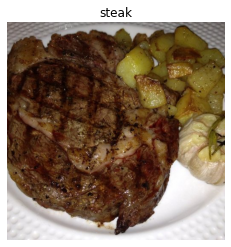

In [46]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

# CNN basic layers

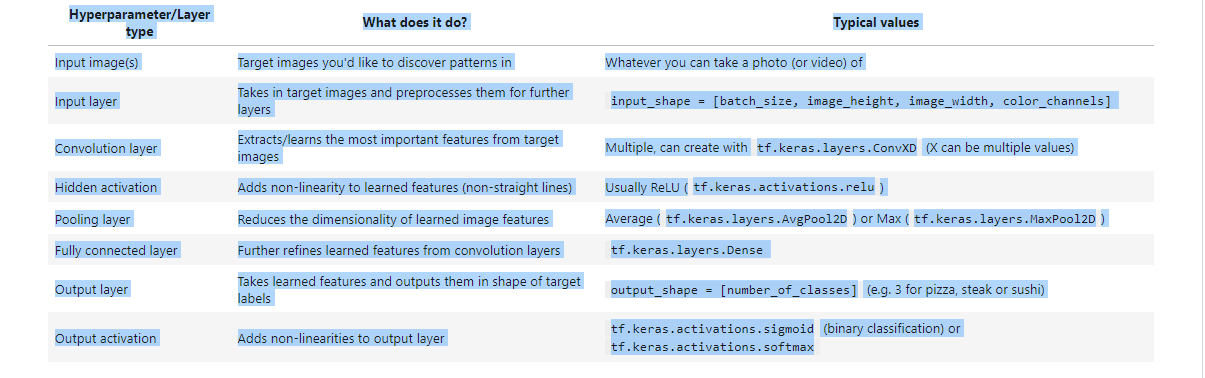# New Section

Image shape: (512, 511, 3)
Image shape: (512, 384, 3)


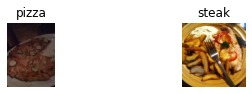

In [47]:
plt.figure()
plt.subplot(3,2,2)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(3, 2, 1)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [48]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [49]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale =1/255.)
test_datagen = ImageDataGenerator(rescale =1/255.)

In [50]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size =(224,224),
                                               class_mode = 'binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size =(224,224),
                                               class_mode = 'binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [51]:
images,labels = train_data.next()
images[:2],images[0].shape

(array([[[[0.9450981 , 0.9450981 , 0.93725497],
          [0.9568628 , 0.9568628 , 0.9490197 ],
          [0.95294124, 0.95294124, 0.95294124],
          ...,
          [0.9450981 , 0.9450981 , 0.9450981 ],
          [0.9568628 , 0.9568628 , 0.9568628 ],
          [0.93725497, 0.93725497, 0.93725497]],
 
         [[0.9568628 , 0.9568628 , 0.9490197 ],
          [0.9490197 , 0.9490197 , 0.94117653],
          [0.89019614, 0.89019614, 0.89019614],
          ...,
          [0.8980393 , 0.8980393 , 0.8980393 ],
          [0.9215687 , 0.9215687 , 0.9215687 ],
          [0.95294124, 0.95294124, 0.95294124]],
 
         [[0.9607844 , 0.9607844 , 0.95294124],
          [0.8862746 , 0.8862746 , 0.87843144],
          [0.9215687 , 0.9215687 , 0.9215687 ],
          ...,
          [0.9490197 , 0.9490197 , 0.9490197 ],
          [0.8862746 , 0.8862746 , 0.8862746 ],
          [0.9568628 , 0.9568628 , 0.9568628 ]],
 
         ...,
 
         [[0.95294124, 0.95294124, 0.95294124],
          [0.85882

In [52]:
import tensorflow as tf
from tensorflow.keras.layers import Dense , Conv2D,MaxPool2D,AveragePooling2D,Flatten

In [53]:

model_1 = tf.keras.Sequential([
Conv2D(10,3,1,activation='relu',input_shape =(224,224,3)),
MaxPool2D(pool_size=2),
Conv2D(10,3,1,activation='relu'),
MaxPool2D(),
Conv2D(10,3,1,activation='relu'),
MaxPool2D(),
Flatten(),
Dense(1,activation='sigmoid')
])

In [54]:
model_1.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

In [55]:
history = model_1.fit(train_data,
                        epochs=5,
                      steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 62s 1s/step - loss: 0.6125 - accuracy: 0.6747 - val_loss: 0.4550 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 53s 1s/step - loss: 0.4397 - accuracy: 0.8020 - val_loss: 0.3814 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 55s 1s/step - loss: 0.4369 - accuracy: 0.8033 - val_loss: 0.3586 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 56s 1s/step - loss: 0.3828 - accuracy: 0.8393 - val_loss: 0.3326 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 52s 1s/step - loss: 0.3645 - accuracy: 0.8453 - val_loss: 0.3188 - val_accuracy: 0.8700


In [56]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 26, 26, 10)      

In [57]:
model_1.evaluate(test_data)

16/16 [==============================] - 7s 408ms/step - loss: 0.3188 - accuracy: 0.8700


[0.3188074231147766, 0.8700000047683716]

In [58]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title(loss)
  plt.xlabel(epochs)
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


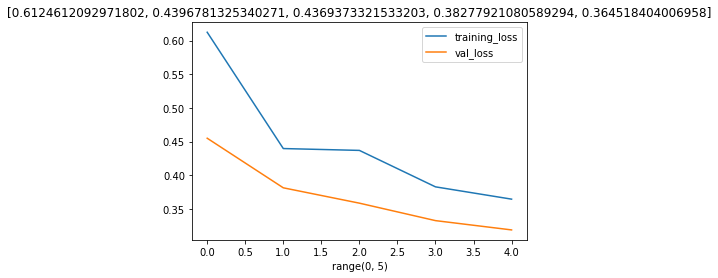

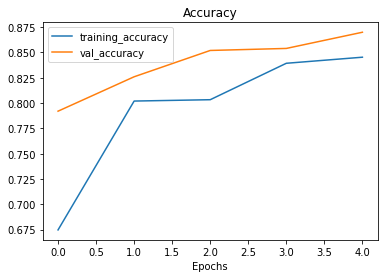

In [59]:
plot_loss_curves(history)

# Data Augmentation

In [60]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range = 0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True)

In [61]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            batch_size=32,
                                                                            shuffle=True,
                                                                            class_mode='binary')

Found 1500 images belonging to 2 classes.


In [62]:
model_2 = tf.keras.Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history2 = model_2.fit(train_data_augmented_shuffled,
            epochs=5,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 105s 2s/step - loss: 0.6838 - accuracy: 0.5507 - val_loss: 0.5267 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 105s 2s/step - loss: 0.5450 - accuracy: 0.7420 - val_loss: 0.4532 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 106s 2s/step - loss: 0.5035 - accuracy: 0.7713 - val_loss: 0.4816 - val_accuracy: 0.7560
Epoch 4/5
47/47 [==============================] - 104s 2s/step - loss: 0.4890 - accuracy: 0.7860 - val_loss: 0.3478 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 104s 2s/step - loss: 0.4558 - accuracy: 0.7900 - val_loss: 0.3284 - val_accuracy: 0.8640


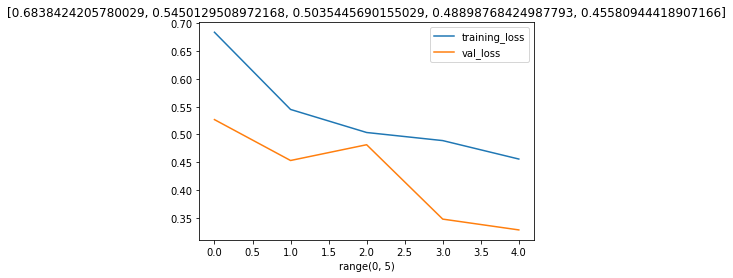

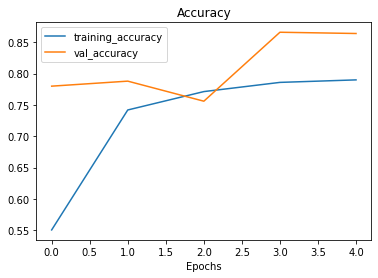

In [63]:
plot_loss_curves(history2)

# Multi-class Classification

In [64]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-20 10:57:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 173.194.192.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   167MB/s    in 3.0s    

2022-05-20 10:57:13 (167 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [65]:
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [66]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [67]:
import pathlib
data_dir = pathlib.Path(train_dir)
data_dir

PosixPath('10_food_classes_all_data/train')

In [68]:
data_dir.glob('*')

<generator object Path.glob at 0x7f9a593c1ad0>

In [69]:
import numpy as np
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [72]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                            width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [74]:
test_datagen = ImageDataGenerator(rescale=1/255.)
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 2500 images belonging to 10 classes.


In [75]:
model_11 =  tf.keras.Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])



model_11.compile(loss='categorical_crossentropy',
                 optimizer='Adam',
                 metrics=['accuracy'])
history_11 =model_11.fit(train_data_augmented,
             epochs=3,
             steps_per_epoch=len(train_data_augmented),
             validation_data= test_data,
             validation_steps=len(test_data))

Epoch 1/3
235/235 [==============================] - 312s 1s/step - loss: 2.1800 - accuracy: 0.2101 - val_loss: 2.1355 - val_accuracy: 0.2136
Epoch 2/3
235/235 [==============================] - 308s 1s/step - loss: 2.0640 - accuracy: 0.2679 - val_loss: 1.9273 - val_accuracy: 0.3208
Epoch 3/3
235/235 [==============================] - 308s 1s/step - loss: 2.0073 - accuracy: 0.3001 - val_loss: 1.9586 - val_accuracy: 0.3032


In [76]:
def load_and_prep_image(filename,img_shape=224):
  img = tf.io.read_file(filename)

  img=tf.image.decode_image(img,channels=3)
  img = tf.image.resize(img,size=[img_shape,img_shape])
  img = img/255.
  return img

In [118]:
def pred_and_plot(model,filename,class_names):
  img = load_and_prep_image(filename)
  pred= model.predict(tf.expand_dims(img,axis=0))
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

--2022-05-20 11:26:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-05-20 11:26:43 (34.1 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



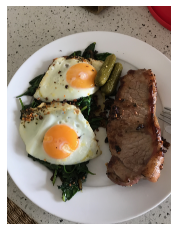

In [80]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

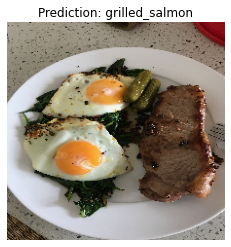

In [120]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

In [115]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [116]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

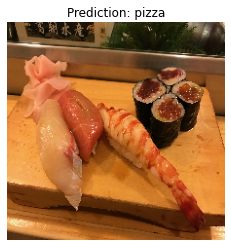

In [119]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

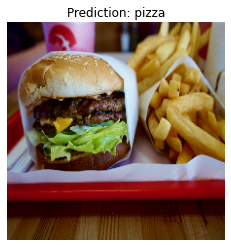

In [121]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

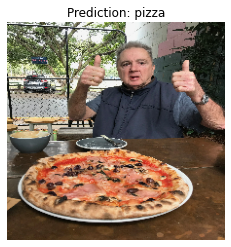

In [122]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

## Saving model

In [123]:
model_11.save("saved_trained_model")
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [124]:
model_11.evaluate(test_data)

79/79 [==============================] - 31s 393ms/step - loss: 1.9586 - accuracy: 0.3032


[1.9585902690887451, 0.30320000648498535]